In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1.1 Premitt算子

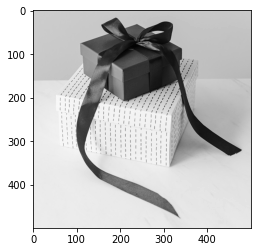

In [3]:
img = cv.imread('pic/gift500x500.jpg', 0)
show(img)

In [11]:
kx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
ky = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

imgX = cv.filter2D(img, cv.CV_64F, kx)
imgY = cv.filter2D(img, cv.CV_64F, ky)

imgXY = np.sqrt(imgX**2 + imgY**2)
imgXY2 = np.abs(imgX) + np.abs(imgY)

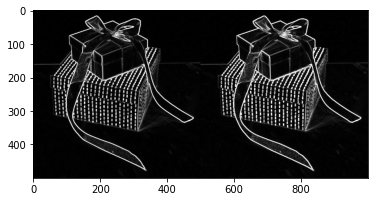

In [13]:
show(np.hstack([imgXY.clip(0,255), imgXY2.clip(0, 255)]))

## 1.2 Roberts算子

In [14]:
kx = np.array([[-1, 0], [0, 1]], dtype=np.float32)
ky = np.array([[0, -1], [1, 0]], dtype=np.float32)

imgX = cv.filter2D(img, cv.CV_64F, kx)
imgY = cv.filter2D(img, cv.CV_64F, ky)

imgXY = np.sqrt(imgX**2 + imgY**2)
imgXY2 = np.abs(imgX) + np.abs(imgY)

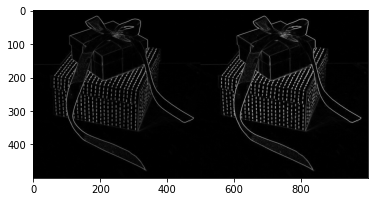

In [15]:
show(np.hstack([imgXY.clip(0,255), imgXY2.clip(0, 255)]))

## 2.1 Sobel-Feldman算子

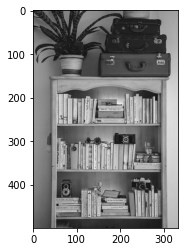

In [18]:
img = cv.imread('pic/bookshelf500x333.jpg', 0)
show(img)

In [19]:
imgX = cv.Sobel(img, cv.CV_16S, 1, 0)
imgY = cv.Sobel(img, cv.CV_16S, 0, 1)

imgXY = np.abs(imgX) + np.abs(imgY)

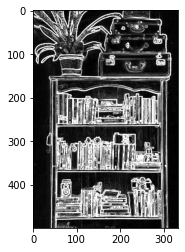

In [21]:
show(imgXY.clip(0, 255))

## 2.2 Scharr算子

In [28]:
imgX = cv.Scharr(img, cv.CV_64F, 1, 0)
imgY = cv.Scharr(img, cv.CV_64F, 0, 1)

imgXY = np.sqrt(imgX**2 + imgY**2)

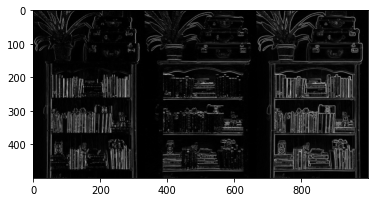

In [25]:
show(np.hstack([np.abs(imgX), np.abs(imgY), imgXY]))

## 3. Laplacian和loG算子

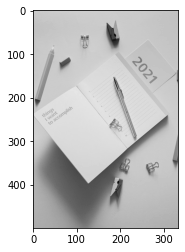

In [29]:
img = cv.imread('pic/notebook500x333.jpg', 0)
show(img)

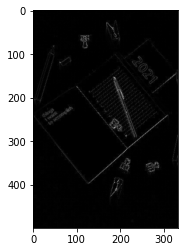

In [31]:
img_lap = cv.Laplacian(img, cv.CV_64F)
show(np.abs(img_lap))

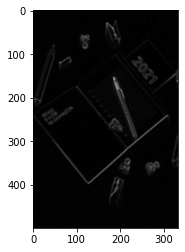

In [32]:
img_blur = cv.GaussianBlur(img, (3,3), 1)
img_log = cv.Laplacian(img_blur, cv.CV_64F)
show(np.abs(img_log))

## 4. Canny边缘检测

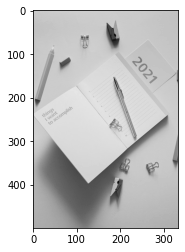

In [5]:
img = cv.imread('pic/notebook500x333.jpg', 0)
show(img)

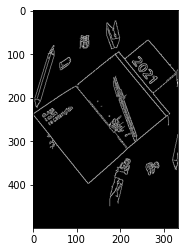

In [6]:
img_edge = cv.Canny(img, 20, 200)

show(img_edge)

## 5. Canny算法实现

In [3]:
img = cv.imread('pic/notebook500x333.jpg', 0)

# 1. 平滑
img_blur = cv.GaussianBlur(img, (5,5), 2)

# 2. 计算梯度
gradx = cv.Sobel(img_blur, cv.CV_64F, 1, 0)
grady = cv.Sobel(img_blur, cv.CV_64F, 0, 1)
R = np.abs(gradx) + np.abs(grady)
T = np.arctan(grady / (gradx + 1e-3))

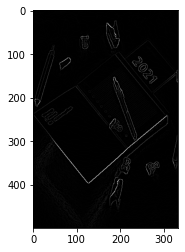

In [4]:
# 3. 细化边缘
h, w = R.shape
img_thin = np.zeros_like(R)

for i in range(1, h-1):
    for j in range(1, w-1):
        theta = T[i,j]
        if -np.pi / 8 <= theta < np.pi / 8:
            if R[i,j] == max([R[i,j], R[i,j-1], R[i, j+1]]):
                img_thin[i,j] = R[i,j]
        elif -3 * np.pi / 8 <= theta < -np.pi / 8:
            if R[i,j] == max([R[i,j], R[i-1,j+1], R[i+1,j-1]]):
                img_thin[i,j] = R[i,j]
        elif np.pi / 8 <= theta < 3 * np.pi / 8:
            if R[i,j] == max([R[i,j], R[i-1,j-1], R[i+1,j+1]]):
                img_thin[i,j] = R[i,j]      
        else:
            if R[i,j] == max([R[i,j], R[i-1,j], R[i+1,j]]):
                img_thin[i,j] = R[i,j]
                
show(img_thin)

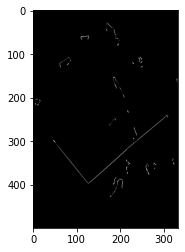

In [5]:
th1 = 20
th2 = 200

h, w = img_thin.shape
img_edge = np.zeros_like(img_thin, dtype=np.uint8)

for i in range(1, h-1):
    for j in range(1, w-1):
        if img_thin[i,j] >= th2:
            img_edge[i,j] = img_thin[i,j]
        elif img_thin[i,j] > th1:
            around = img_thin[i-1:i+2, j-1:j+2]
            if around.max() >= th2:
                img_edge[i,j] = img_thin[i,j]
                
show(img_edge)